In [10]:
import collections
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open('Интервью.txt', encoding="utf8")
a= file.read().split('\n')

In [11]:
target_words = ['agency','interest','motivation','involve','active', 'agent', 'work', 'worker', 'intence', 'activity',
                'education', 'perception', 'experience', 'skills', 'values', 'wisdom', 'culture', 'mentality', 'family', 'background', 'university',                              
                'context', 'environment', 'atmosphere', 'office', 'online', 'collegue', 'network', 'community', 'communication', 'team', 
                'inner', 'attitude', 'religion', 'faith', 'behaviour', 'bahavior', 'routine', 'tradition', 'schedule', 'ideology',
                'strategy', 'future', 'planning', 'idea', 'innovation', 'creative',
                'analytics', 'analysis', 'prediction', 'reaction', 'reactivity', 'solve', 'problem', 'efficiency', 'reflection',
               'artificial intelligence', 'AI', 'machine learning', 'MO', 'neural', 'network', 'deep', 'learning', 'algorithm', 'code', 'program']

In [12]:
stopwords = set(line.strip() for line in open('stopwords.txt'))
stopwords = stopwords.union(set(['a','an','[Music]','and','the','you know','Yeah', 'thank you', '[Applause]', 'and uh', ' ', 'here', 'now']))

wordcount = {}
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a:
    word = word.replace(" ","")
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [13]:
print(stopwords)

{'', '[Applause]', '[Music]', "it's", 'Yeah', 'umso', 'likethat', 'this', 'like', 'are', "don't", 'probably', 'as', 'um', 'theycan', 'but', 'really', 'have', 'well', 'and', 'them', 'thisis', 'so', 'yep', 'a', 'п»їthe', '[Laughter]', 'anduh', 'andthen', 'out', 'was', 'and uh', 'right', "that's", 'whichis', 'if', 'or', 'in', '100', 'important', 'on', 'forexample', 'we', 'foryou', 'about', 'an', 'can', 'of', 'your', 'rightlike', 'all', 'at', 'okay', 'ina', 'whatever', 'for', 'there', 'people', 'think', 'kind', 'do', 'you', 'today', 'actually', 'i', 'the', ' ', 'yeah', 'because', 'what', 'how', 'not', 'problem', 'to', 'here', 'know', 'thank you', 'thankyou', 'now', 'where', 'just', 'it', 'kindof', 'is', 'verinthe', 'that', 'they', 'uh', 'andso', 'youknow', 'you know', 'thestore', 'yeahyeah', 'with', 'be', 'one'}


How many most common words to print: 20

OK. The 20 most common words are as follows

community :  6
technology :  5
AI :  5
companies :  5
way :  4
organization :  4
journey :  4
store :  4
different :  4
story :  4
self-checkout :  4
especially :  4
experience :  4
years :  4
yourself :  4
together :  4
industry :  4
always :  4
level :  4
employerbrand :  4


<Axes: xlabel='Word'>

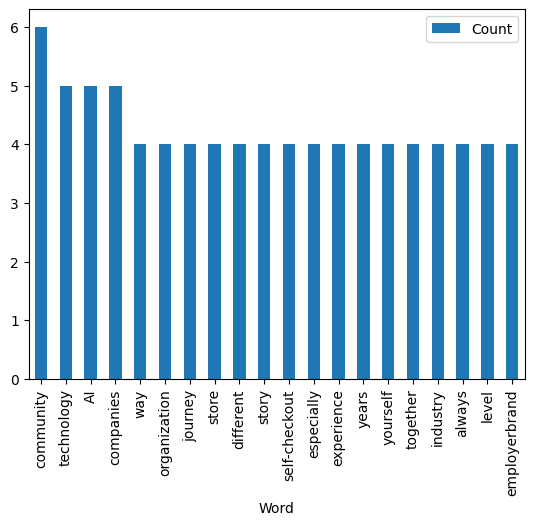

In [18]:
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

In [16]:
def extract_words(new_list, target_words):
    # split the sentence into words
    words = new_list.split("\n")
    
    # find the index of target_word within the list of words
    if target_words not in new_list.split(' '):
        return list()
    target_index = words[0].split(' ').index(target_words)
    
    # slice the list of words to extract three words before and after the target word
    left_words = new_list.split(' ')[max(0, target_index-3):target_index]
    right_words = new_list.split(' ')[target_index+1:min(target_index+4, len(words))]
    
    # return the concatenated string of the extracted words
    return left_words + right_words

def delete_stopwords(sentence):
    stopwords = set(line.strip() for line in open('stopwords.txt'))
    t = sentence.split(' ')
    t = [w for w in t if w not in stopwords]
    return ' '.join(t)

list_of_lists = list()
for i in range(len(target_words)):
    new_list = list()
    for s in a:
        s_clean = delete_stopwords(s)
        new_list += extract_words(s_clean, target_words[i])
    list_of_lists.append(new_list)
    
    print(s)
    print(f'target word = {target_words[i]}')
    print(f'close words = {list_of_lists[i]}')

you
target word = agency
close words = ['started', 'marketing', 'pain', 'point', 'the', 'letting', 'go', 'our', 'clients', 'operating', 'an', 'ads', 'grow', 'an', 'very', 'easily', 'an', 'want', 'outsource', 'an']
you
target word = interest
close words = ['which', 'earnings', 'before', 'and', 'lot', 'If', 'the', 'same', 'understand', 'why', "there's", 'always', 'had', 'an', 'the', 'regions', 'community', 'around', 'an', 'evoked', 'and', 'my', 'general', 'evoked', 'and', 'my', 'general', 'says', 'it’s', 'the', 'wonders', 'the', 'investor', 'has', 'profit', 'who', 'profit']
you
target word = motivation
close words = ['behind', 'the', 'the']
you
target word = involve
close words = []
you
target word = active
close words = ['and', 'went', 'boom', 'these', 'get', 'hands-on', 'an', 'I', "you're", 'more', "they're", "there's", 'very', 'creating', 'collaborative', 'collaborative', 'say', "you've", 'been', 'particular', 'very', 'the', 'founders', 'second', "we're", 'another', 'thing', 'very', '

you
target word = mentality
close words = ['and', 'take', 'the', 'trying', 'change']
you
target word = family
close words = ['looked', 'over', 'my', 'easy', 'texting', 'stops', 'the', 'go', 'between', 'the', 'the', 'the', 'dimension', 'the', 'see', 'big', 'their', 'hobbies', 'their', 'from', 'friends', 'and']
you
target word = background
close words = ['myself', 'marketer', 'my', 'story', 'terms', 'happening', 'the', "what's", 'happening', 'the', 'first,', 'my', 'original', 'and', 'and', 'us', 'little', 'bit', 'up', 'fairly', 'humble', 'finance', 'lighting', 'plus', 'busy', 'busy', 'versus', "didn't", 'speech', 'an', 'engineer', 'by', 'the', 'though', 'the', 'the', 'come', 'from', 'technical', 'from', 'very', 'technical', 'my', 'theory', 'my', 'my', 'the', 'hanging', 'the', 'little']
you
target word = university
close words = ['raises', 'boats', 'moment', 'echo', 'scholar', 'the', 'being', 'analyzed', 'part']
you
target word = context
close words = ['the', 'the', 'seamlessly', 'monitor

you
target word = planning
close words = ['many', 'aspects', 'discharge', 'he', "wasn't"]
you
target word = idea
close words = ['and', 'basically', 'got', 'then', 'had', 'the', 'courses', 'had', 'the', 'me', 'through', 'get', 'come', 'up', 'an', 'and', 'hey', "here's", 'never', 'had', 'the', 'he', 'has', 'no', 'good', 'products', 'no', 'companies', 'pretty', 'good', 'unique', 'came', 'up', 'the', 'whose', 'job', 'no', 'I', 'had', 'no', 'particular', "there's", 'especially', 'love', 'which', 'gives', 'an', 'world', 'showcase', 'an', 'reason', 'why', 'I', 'no', 'I', 'guess,', 'the', 'everything', 'warm', 'the', 'everyone', 'talks', 'the', 'technology', 'first', 'came', 'amazon', 'go', 'the', 'excited', 'the', 'our', 'our', 'original', 'our', 'give', 'an', 'pretty', 'good', 'an', 'and', 'give', 'an', 'gives', 'some', 'innovation."We', 'had', 'an', 'tasks', 'the', 'general', 'modelling', 'which', 'the', 'incubator', 'experience', 'the', 'core', 'the', 'no', 'pretty', 'good', 'started', 'an

you
target word = program
close words = ['into', 'HubSpot', 'User', 'Group', 'the', 'opportunity', 'build', 'the', 'target', 'accelerators', 'tech', 'accelerator', 'had', 'company', 'the', 'never', 'going']
